# What Test to Use Challenge

An important point to consider when working with data is whether to use parametric or nonparametic methods.

Parametric methods assume the data has a known specific distribution.  (Normal/Gaussian)
Nonparametric methods don't make assumptions about the data's distribution.

Before we can choose an appropriate test we must first determine if a sample is normal.  For determining normality we can use visual and statistical tests.

### Visual Checks for Normality
Visual checks are qualitative and therefore less accurate than statistical checks.  
#### Plots to use:
 - Histograms: Bell curve
 - QQ Plot: Line at 45 degree angle from bottom left to top right

In [98]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [357]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('bright')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

### Statistical Checks for Normality
Reference: [Machine Learning Mastery](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

#### Anderson-Darling Test
This test can be used to check if data comes from one of many known distributions, including the normal distribution.  It returns a list of critical values instead of only a single p-value and can therefore allow a more thorough interpretation.

In [ ]:
## Anderson-Darling test for Normality
def anderson_darling(data):
    result = scipy.stats.anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

#### D'Agostino's $K^{2}$ Test
This test calculates kurtosis and skewness to determine if the data distribution is normal.  Returns the test statistic and the p-value.
 - Skew: Quantification of how much a distribution is pushed left/right.  Measure of asymmetry.
 - Kurtosis: Quantification of how much of the distribution is in the tail.

In [86]:
def dagostino(data):
    stat, p = scipy.stats.normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret against alpha of 5%
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

#### Shapiro-Wilk Test
This test evaluates how likely the sample was drawn from a normal distribution.  Returns the p-value and W-statistic.  
**This test may be more suitable for samples less than several thousand observations.

In [89]:
def shapiro(data):
    stat, p = scipy.stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [7]:
# load our data
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [12]:
# dropping all null values
df.dropna(inplace=True)

## Did people become less trusting from 2012 to 2014?

In [ ]:
# creating separate dataframes for each year 
df.year.replace(6, 2012, inplace=True)
df_2012 = df.loc[df.year == 2012
                ]
df.year.replace(7, 2014, inplace=True)
df_2014 = df.loc[df.year == 2014]

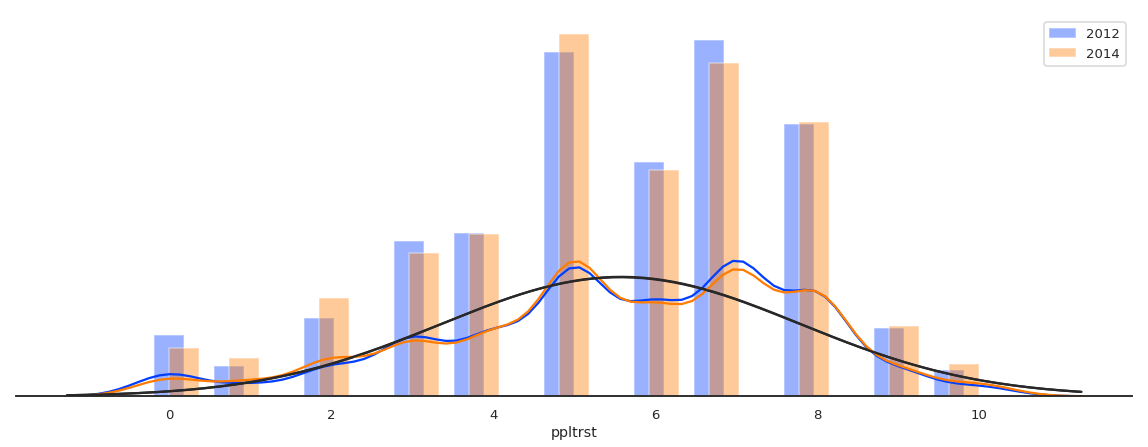

In [358]:
# histogram
from scipy.stats import norm

fig, ax = plt.subplots()

ax = sns.distplot(df_2012.ppltrst,
                  fit=norm,
                  hist_kws={'align':'left'},
                  label='2012')
ax = sns.distplot(df_2014.ppltrst,
                  fit=norm,
                  label='2014')


sns.despine(left=True)
ax.set(yticklabels=[])
plt.legend()
plt.show()

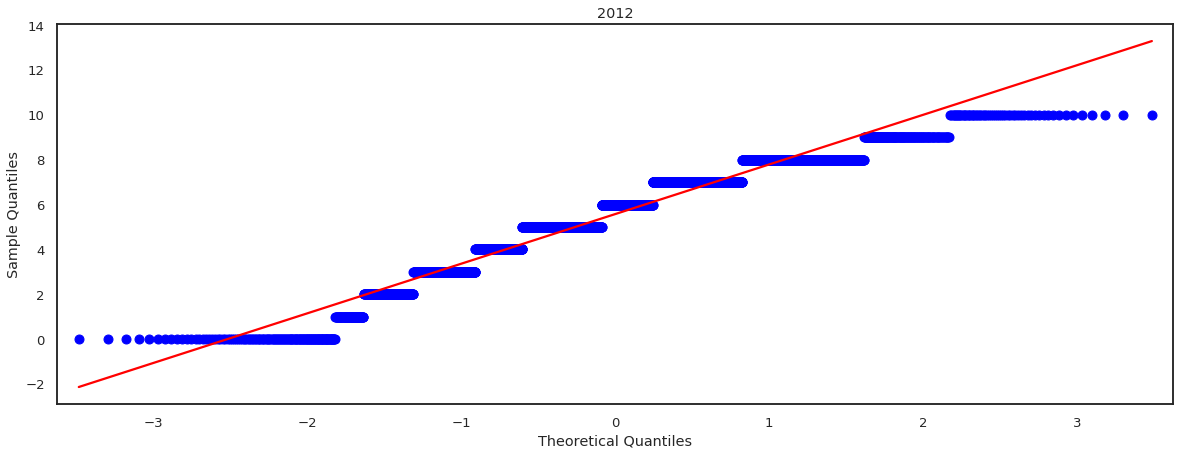

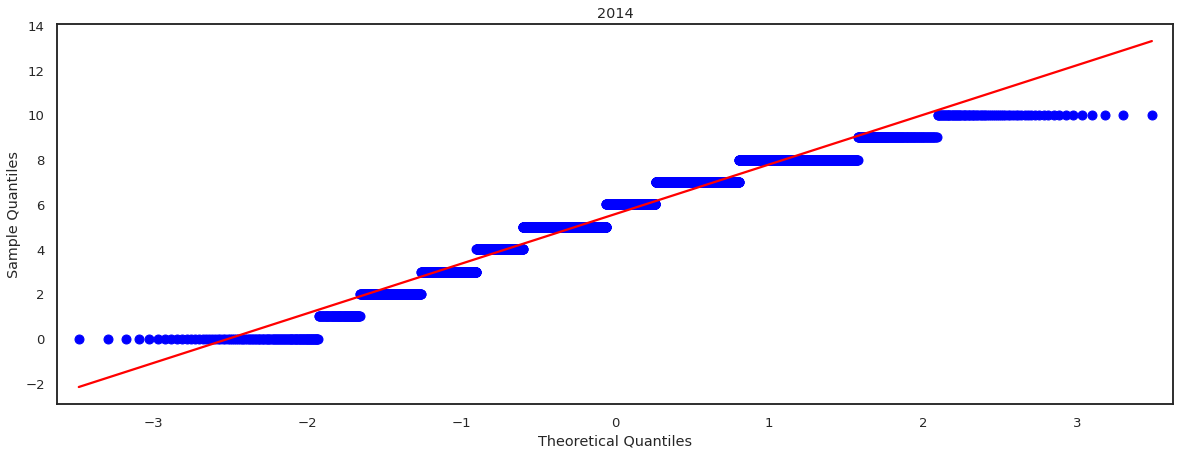

In [111]:
# qq plot
fig = sm.qqplot(df_2012.ppltrst, line='s')
plt.title('2012')
fig = sm.qqplot(df_2014.ppltrst, line='s')
plt.title('2014')

plt.show()

In [81]:
## Anderson-Darling Test for Normality
anderson_darling(df_2012.ppltrst)
print('2014')
anderson_darling(df_2014.ppltrst)

Statistic: 67.153
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
2014
Statistic: 61.296
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [88]:
# D'Agostino Test
print('2012')
dagostino(df_2012.ppltrst)
print('2014')
dagostino(df_2014.ppltrst)

2012
Statistics=179.471, p=0.000
Sample does not look Gaussian (reject H0)
2014
Statistics=144.907, p=0.000
Sample does not look Gaussian (reject H0)


In [90]:
# Shapiro-Wilk Test
print('2012')
shapiro(df_2012.ppltrst)
print('2014')
shapiro(df_2014.ppltrst)

2012
Statistics=0.952, p=0.000
Sample does not look Gaussian (reject H0)
2014
Statistics=0.958, p=0.000
Sample does not look Gaussian (reject H0)


From our statistical tests and visualizations we can see the data is not normally distributed.  We must use a nonparametric test.  From the codebook we know that all participants participated in the survey for both years.  In this situation a Wilcoxon signed rank test should be appropriate.  

#### Wilcoxon Signed Rank Test
This test is the nonparametric version of the dependent samples t-test.  It tests the null hypothesis that two related paired samples come from the same distribution.

In [150]:
print('2012')
print(df_2012.shape)
print('2014')
print(df_2014.shape)

2012
(4071, 13)
2014
(4076, 13)


The Wilcoxon Signed Rank Test requires that both groups be the same length, which our series are not.  We could use this test if we dropped 5 rows from our 2012 series, but after checking for matching ID numbers in both series we find there are a majority that are different between the two years.  Another option for test to use is the Mann-Whitney U Test.  

#### Mann-Whitney U Test
According to [Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) this is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.  The major difference from the Wilcoxon test is that Mann-Whitney tests independant samples while Wilcoxon tests dependant samples.

In [153]:
print(scipy.stats.mannwhitneyu(df_2012.ppltrst, df_2014.ppltrst))
print('\n 2012 Trust Median')
print(df_2012.ppltrst.median())
print('2012 Trust Mean')
print(df_2012.ppltrst.mean())
print('\n 2014 Trust Median')
print(df_2014.ppltrst.median())
print('2014 Trust Mean')
print(df_2014.ppltrst.mean())

MannwhitneyuResult(statistic=8260446.0, pvalue=0.364910173807647)

 2012 Trust Median
6.0
2012 Trust Mean
5.578481945467944

 2014 Trust Median
6.0
2014 Trust Mean
5.5713935230618254


#### No.  People did not become less trusting from 2012 to 2014.
 - Our p-value is 0.36 which is greater than 0.05.  Therefore we cannot reject the null hypothesis and we must conclude there is no significant difference between the means of the two groups.
 - Our medians for both groups are 6.  
 - Our means for the groups are very close - 5.58 for 2012 and 5.57 for 2014.
 
While we determined that our data was not normally distributed it can still be helpful to look at measures of central tendancy to confirm our finding.

## Did people become happier from 2012 to 2014?

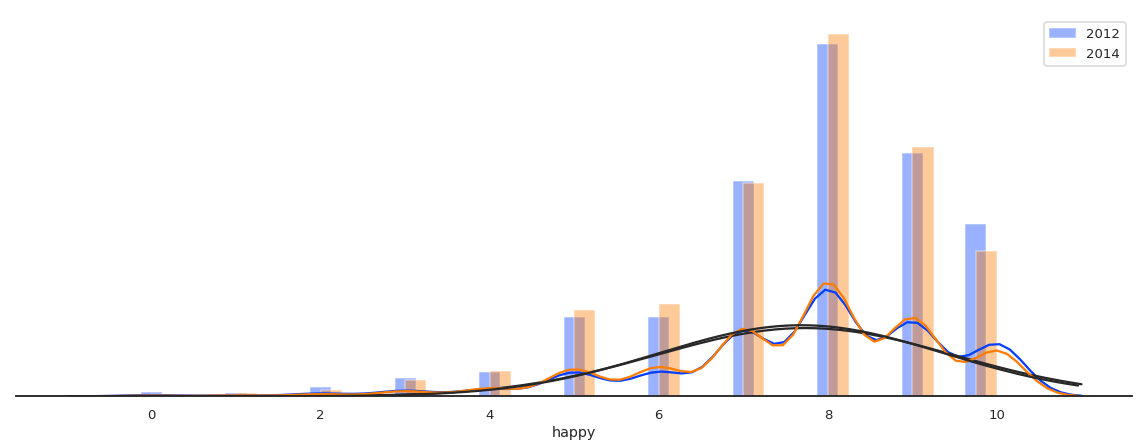

In [157]:
fig, ax = plt.subplots()

ax = sns.distplot(df_2012.happy,
                  fit=norm,
                  hist_kws={'align':'left'},
                  label='2012')
ax = sns.distplot(df_2014.happy,
                  fit=norm,
                  label='2014')


sns.despine(left=True)
ax.set(yticklabels=[])
plt.legend()
plt.show()

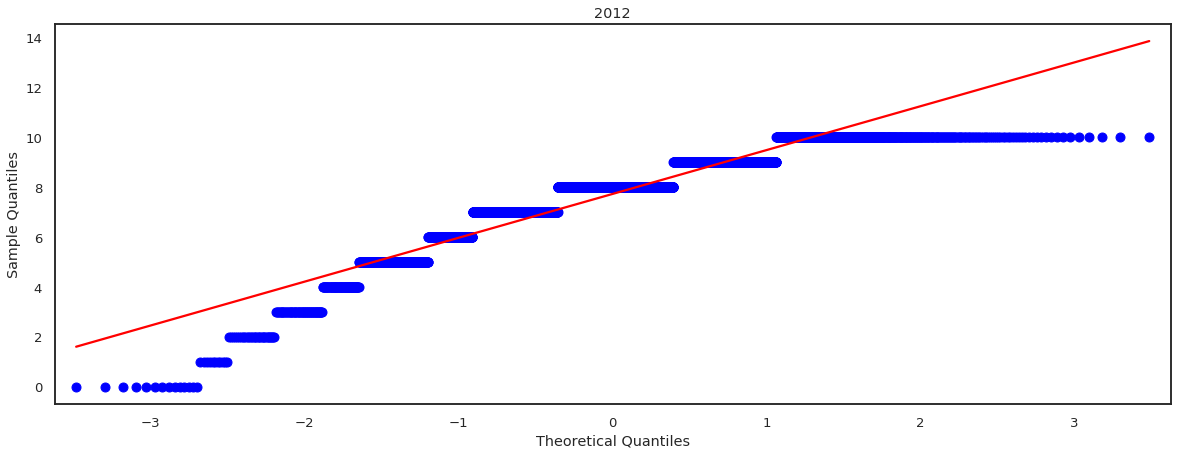

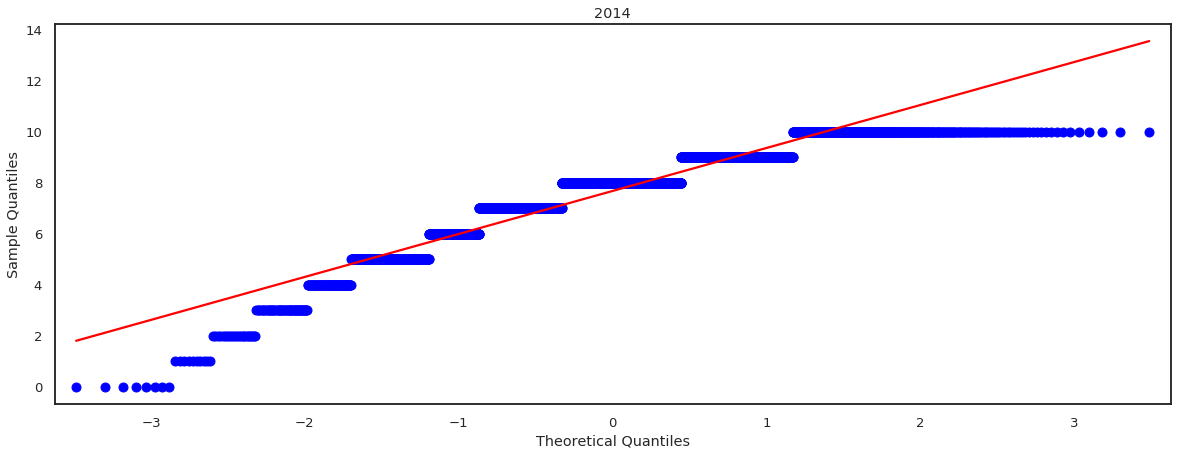

In [110]:
# qq plot
fig = sm.qqplot(df_2012.happy, line='s')
plt.title('2012')
fig = sm.qqplot(df_2014.happy, line='s')
plt.title('2014')

plt.show()

In [80]:
## Anderson-Darling test for Normality
print('2012')
anderson_darling(df_2012.happy)
print('2014')
anderson_darling(df_2014.happy)

2012
Statistic: 123.618
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
2014
Statistic: 118.245
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [91]:
# D'Agostino Test
print('2012')
dagostino(df_2012.happy)
print('2014')
dagostino(df_2014.happy)

2012
Statistics=775.746, p=0.000
Sample does not look Gaussian (reject H0)
2014
Statistics=645.375, p=0.000
Sample does not look Gaussian (reject H0)


In [94]:
# Shapiro-Wilk Test
print('2012')
shapiro(df_2012.happy)
print('2014')
shapiro(df_2014.happy)

2012
Statistics=0.894, p=0.000
Sample does not look Gaussian (reject H0)
2014
Statistics=0.906, p=0.000
Sample does not look Gaussian (reject H0)


We can use the Mann-Whitney U Test again here as our statistical tests showed the happy data do not follow a normal distribution and we determined above our groups are not the same length.

In [156]:
print(scipy.stats.mannwhitneyu(df_2012.happy, df_2014.happy))
print('\n 2012 Happy Median')
print(df_2012.happy.median())
print('2012 Happy Mean')
print(df_2012.happy.mean())
print('\n 2014 Happy Median')
print(df_2014.happy.median())
print('2014 Happy Mean')
print(df_2014.happy.mean())

MannwhitneyuResult(statistic=8096343.0, pvalue=0.02679503248642277)

 2012 Happy Median
8.0
2012 Happy Mean
7.731515598133137

 2014 Happy Median
8.0
2014 Happy Mean
7.6854759568204125


According to the Mann-Whitney test there is a significant difference between groups.  Lets also try Moon's Median Test to confirm.  

#### Moon's Median Test
This is a special case of the chi-squared test and is for nonparametric data.  The data in each sample are divided into two groups, one group with values higher than the combined median of both groups and the other with values below the combined median.  
Moon's Median test only considers the position of each observation relative to the overall median, while Mann-Whitney and Kruskal-Wallis take the ranks of each observation into account.

In [161]:
stat, p, median, table = scipy.stats.median_test(df_2012.happy, df_2014.happy)
print('Chi Squared Statistic: ', stat)
print('P-Value: ', p)
print('Median: ', median)
print('Table (Row 1 = Counts Above Grand Median, Row 2 = Counts Below Grand Median)')
print(table)

Chi Squared Statistic:  3.0630364166228192
P-Value:  0.08009187238130255
Median:  8.0
Table (Row 1 = Counts Above Grand Median, Row 2 = Counts Below Grand Median)
[[1411 1337]
 [2660 2739]]


Since we are getting conflicting results, lets try one more test.

#### Kruskal-Wallis H-Test for Independent Samples
This tests the null hypothesis that the population median of all of the groups are equal.  This test extends the Mann-Whitney Test as Mann-Whitney can only be used for two groups, while Kruskal can test two or more groups and is better for larger samples.  It is a nonparametric version of ANOVA.  

In [168]:
scipy.stats.kruskal(df_2012.happy, df_2014.happy)

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

#### No.  People did not become happier from 2012 to 2014.
- From the Mann-Whitney test our p-value is 0.26.
- Moon's Median Test returned a p-value of 0.08.
- Kruskal-Wallis's p-value is 0.054 which is slightly greater than our alpha of 0.05
  
Only one tests p-value was less than 0.05 so we cannot reject the null hypothesis and must conclude that people reported similar happiness values for both years.   
  
However 2012's happiness mean is slightly higher than 2014's with values of 7.73 and 7.69 respectively.  It would be interesting to see later years data to see if happiness is actually decreasing over time.

## Who reported watching more TV in 2012, men or women?

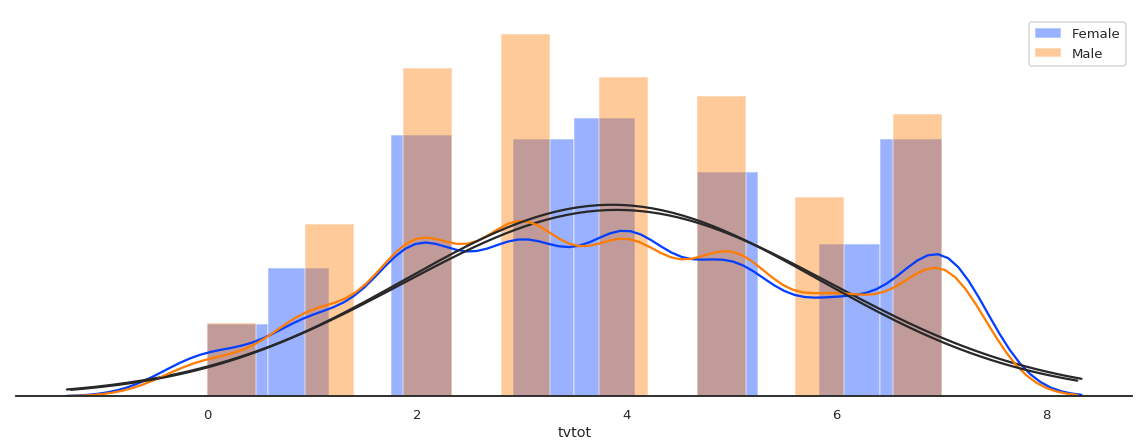

In [178]:
tv_f = df_2012.loc[(df_2012.gndr == 2)]
tv_m = df_2012.loc[(df_2012.gndr == 1)]

fig, ax = plt.subplots()

ax = sns.distplot(tv_f.tvtot,
                  fit=norm,
                  #hist_kws={'align':'left'},
                  label='Female')
ax = sns.distplot(tv_m.tvtot,
                  fit=norm,
                  #hist_kws={'align':'right'},
                  label='Male')


sns.despine(left=True)
ax.set(yticklabels=[])
plt.legend()
plt.show()

In [175]:
# lets make sure we have a similar sample size for male and female

print('Female: ', tv_f.shape)
print('Male: ', tv_m.shape)

Female:  (2018, 13)
Male:  (2053, 13)


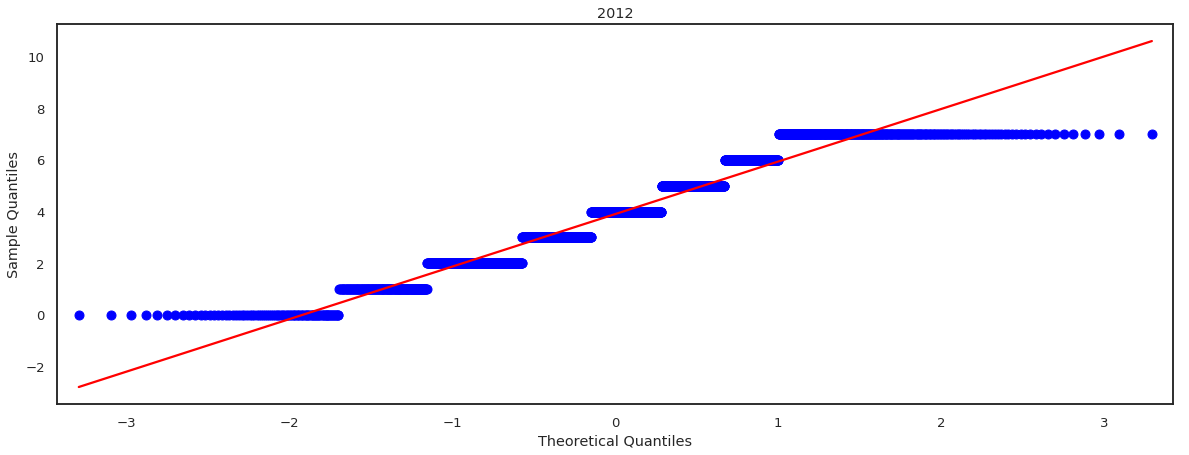

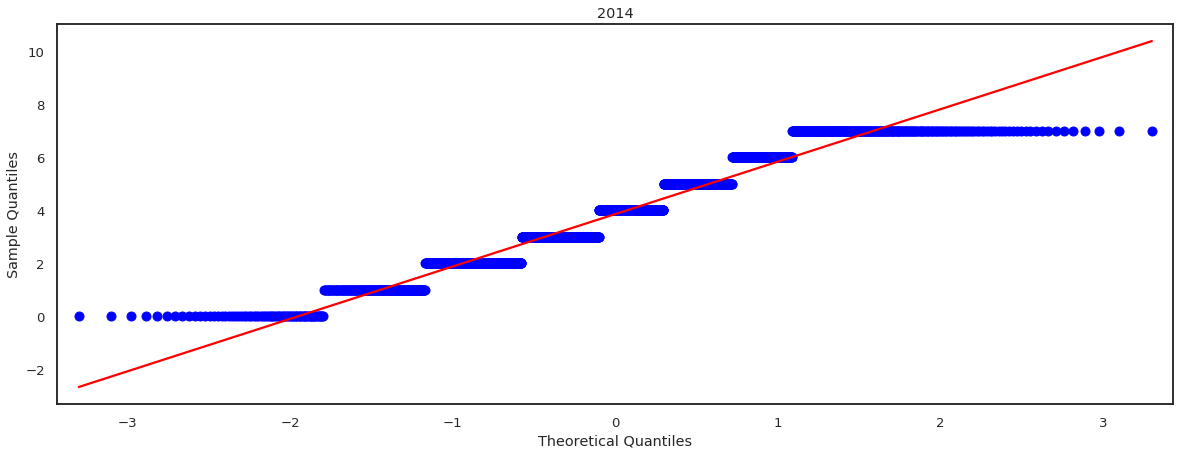

In [112]:
# qq plot
fig = sm.qqplot(tv_f.tvtot, line='s')
plt.title('Female')
fig = sm.qqplot(tv_m.tvtot, line='s')
plt.title('Male')

plt.show()

In [82]:
## Anderson-Darling Test for Normality
print('Female')
anderson_darling(tv_f.tvtot)
print('Male')
anderson_darling(tv_m.tvtot)

Female
Statistic: 35.024
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
Male
Statistic: 34.760
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


In [92]:
# D'Agostino Test
print('Female')
dagostino(tv_f.tvtot)
print('Male')
dagostino(tv_m.tvtot)

Female
Statistics=402.489, p=0.000
Sample does not look Gaussian (reject H0)
Male
Statistics=369.779, p=0.000
Sample does not look Gaussian (reject H0)


In [95]:
# Shapiro-Wilk Test
print('Female')
shapiro(tv_f.tvtot)
print('Male')
shapiro(tv_m.tvtot)

Female
Statistics=0.941, p=0.000
Sample does not look Gaussian (reject H0)
Male
Statistics=0.944, p=0.000
Sample does not look Gaussian (reject H0)


In [162]:
scipy.stats.kruskal(tv_f.tvtot, tv_m.tvtot)

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

In [164]:
scipy.stats.mannwhitneyu(tv_f.tvtot, tv_m.tvtot)

MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)

In [167]:
print('\n Female TV Median')
print(tv_f.tvtot.median())
print('Female TV Mean')
print(tv_f.tvtot.mean())
print('\n Male Median')
print(tv_m.tvtot.median())
print('Male Mean')
print(tv_m.tvtot.mean())


 Female TV Median
4.0
Female TV Mean
3.9053518334985133

 Male Median
4.0
Male Mean
3.8592303945445687


#### In 2012, women reported watching more TV than men.
 - From both our Kruskal and Mann-Whitney tests the p-value is greater than 0.05 so we can reject the null hypothesis of no difference between groups.
 - The mean for both groups is the same at 4
 - The median for women is greater than for men with values of 3.91 and 3.86 respectively.  From this we can conclude that women reported watching more TV than men.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

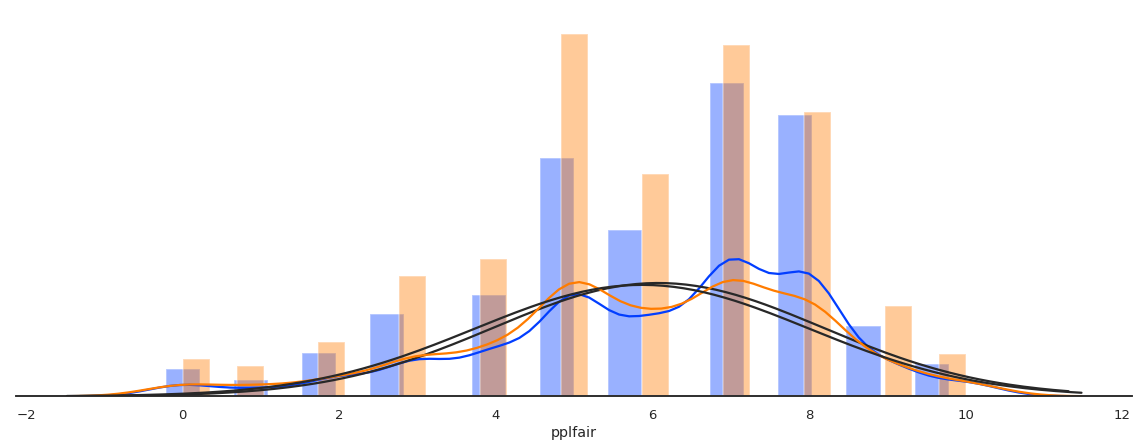

In [58]:
live_partner = df_2012.loc[(df_2012.partner == 1)]
live_alone = df_2012.loc[(df_2012.partner == 2)]

fig, ax = plt.subplots()

ax = sns.distplot(live_partner.pplfair,
                  fit=norm,
                  hist_kws={'align':'left'},
                  label='Lives with Partner')
ax = sns.distplot(live_alone.pplfair,
                  fit=norm,
                  label='Lives Alone')


sns.despine(left=True)
ax.set(yticklabels=[])

plt.show()

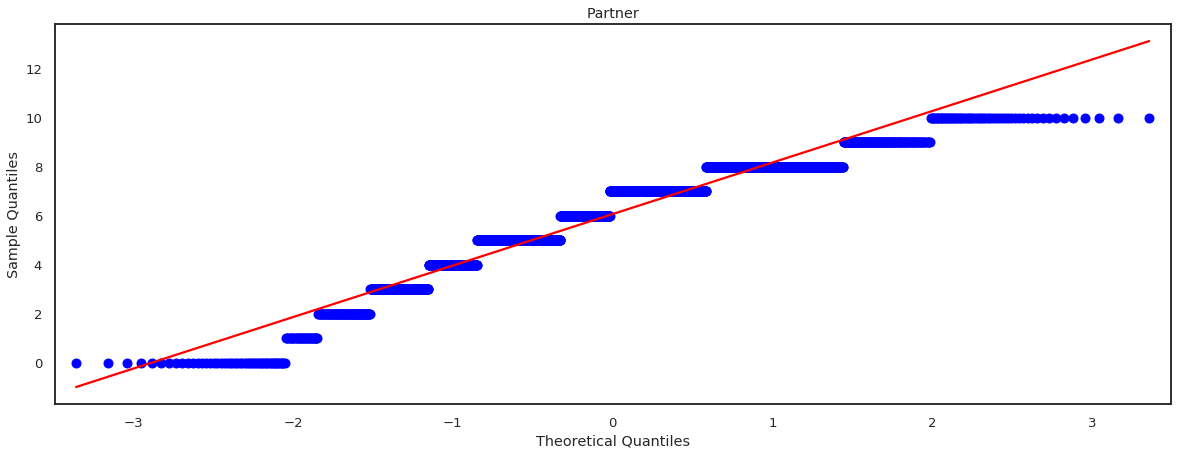

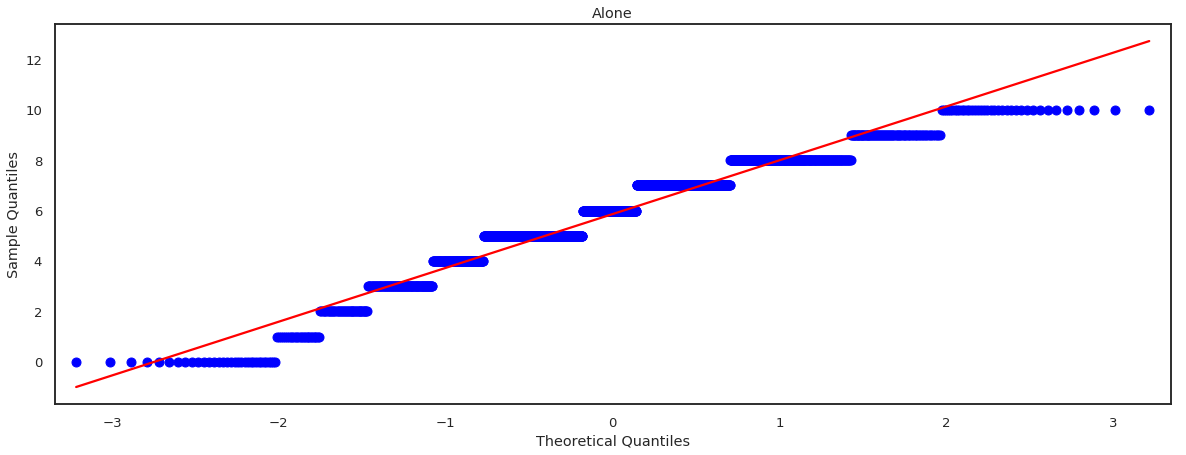

In [114]:
# qq plot
fig = sm.qqplot(live_partner.pplfair, line='s')
plt.title('Partner')
fig = sm.qqplot(live_alone.pplfair, line='s')
plt.title('Alone')

plt.show()

In [83]:
## Anderson-Darling Test for Normality
print('Partner')
anderson_darling(live_partner.pplfair)
print('Alone')
anderson_darling(live_alone.pplfair)

Partner
Statistic: 54.863
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
Alone
Statistic: 24.196
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


In [93]:
# D'Agostino Test
print('Partner')
dagostino(live_partner.pplfair)
print('Alone')
dagostino(live_alone.pplfair)

Partner
Statistics=178.470, p=0.000
Sample does not look Gaussian (reject H0)
Alone
Statistics=66.566, p=0.000
Sample does not look Gaussian (reject H0)


In [96]:
# Shapiro-Wilk Test
print('Partner')
shapiro(live_partner.pplfair)
print('Alone')
shapiro(live_alone.pplfair)

Partner
Statistics=0.940, p=0.000
Sample does not look Gaussian (reject H0)
Alone
Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)


In [179]:
# Kruskal test
scipy.stats.kruskal(live_partner.pplfair, live_alone.pplfair)

KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)

In [182]:
print('Fair Partner Mean: ', live_partner.pplfair.mean())
print('Fair Partner Median: ', live_partner.pplfair.median())
print('Fair Alone Mean: ', live_alone.pplfair.mean())
print('Fair Alone Median: ', live_alone.pplfair.median())

Fair Partner Mean:  6.0743509047993705
Fair Partner Median:  7.0
Fair Alone Mean:  5.86592544146501
Fair Alone Median:  6.0


#### In 2012 people living with a partner were more likely to believe people were fair.
 - From the Kruskal Test our p-value is 0.0006 which allows us to reject the null hypothesis.  There is a significant difference between the two groups.
 - The median values for living with a partner vs alone are 7 and 6 respectively.
 - The mean values for living with a partner vs alone are 6.07 and 5.86 respectively.
  
From these tests we can conclude people living with a partner were more likely to report believing people are fair.

## Compare how often people met socially in 2014.  Are there differences between countries?

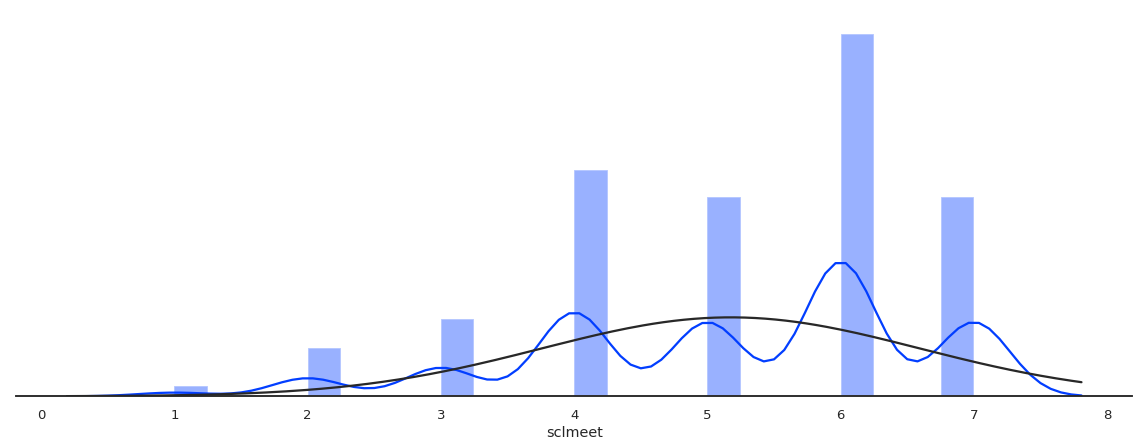

In [440]:
fig, ax = plt.subplots()

ax = sns.distplot(df_2014.sclmeet,
                  fit=norm)

sns.despine(left=True)
ax.set(yticklabels=[])

plt.show()

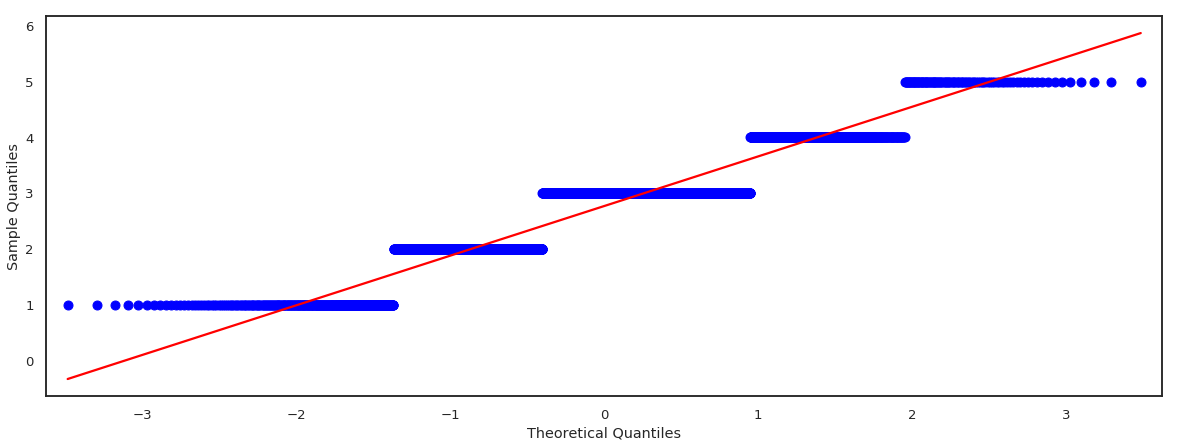

In [125]:
# qq plot
fig = sm.qqplot(df_2014.sclact, line='s')

In [126]:
## Anderson-Darling Test for Normality
anderson_darling(df_2014.sclmeet)

Statistic: 140.405
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [127]:
# D'Agostino Test
dagostino(df_2014.sclmeet)

Statistics=243.733, p=0.000
Sample does not look Gaussian (reject H0)


In [128]:
# Shapiro-Wilk Test
shapiro(df_2014.sclmeet)

Statistics=0.906, p=0.000
Sample does not look Gaussian (reject H0)


In [271]:
# create list of countries
cntry = list(df.cntry.unique())
print(cntry)
country = cntry

# create dictionary of dataframes filtered by country
countries = {}
for x in country:
        countries["{0}".format(x)]=df[df.cntry == x]

for x in range(len(country)):
    country[x] = countries[country[x]]
country[0].head()

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [272]:
ch_sclmeet = country[0].sclmeet
cz_sclmeet = country[1].sclmeet
de_sclmeet = country[2].sclmeet
es_sclmeet = country[3].sclmeet
no_sclmeet = country[4].sclmeet
se_sclmeet = country[5].sclmeet

In [435]:
stat, p, median, table = scipy.stats.median_test(ch_sclmeet,
                                                 cz_sclmeet,
                                                 de_sclmeet,
                                                 es_sclmeet,
                                                 no_sclmeet,
                                                 se_sclmeet)
print('Chi Squared Statistic: ', stat)
print('P-Value: ', p)
print('Median: ', median)
print('Table (Row 1 = Counts Above Grand Median, Row 2 = Counts Below Grand Median)')
print(table)

Chi Squared Statistic:  187.5342042718359
P-Value:  1.3147198822683782e-38
Median:  6.0
Table (Row 1 = Counts Above Grand Median, Row 2 = Counts Below Grand Median)
[[ 169  143    0  492  302  470]
 [1306 1064   27 1800 1118 1256]]


In [436]:
cntry = list(df.cntry.unique())

table = pd.DataFrame(table)
table.columns = cntry
table = table.T
table.index.name = 'Country'
table.columns = ['Above Median', 'Below Median']
table.head(6)

,Above Median,Below Median
Country,,
CH,169,1306
CZ,143,1064
DE,0,27
ES,492,1800
NO,302,1118
SE,470,1256


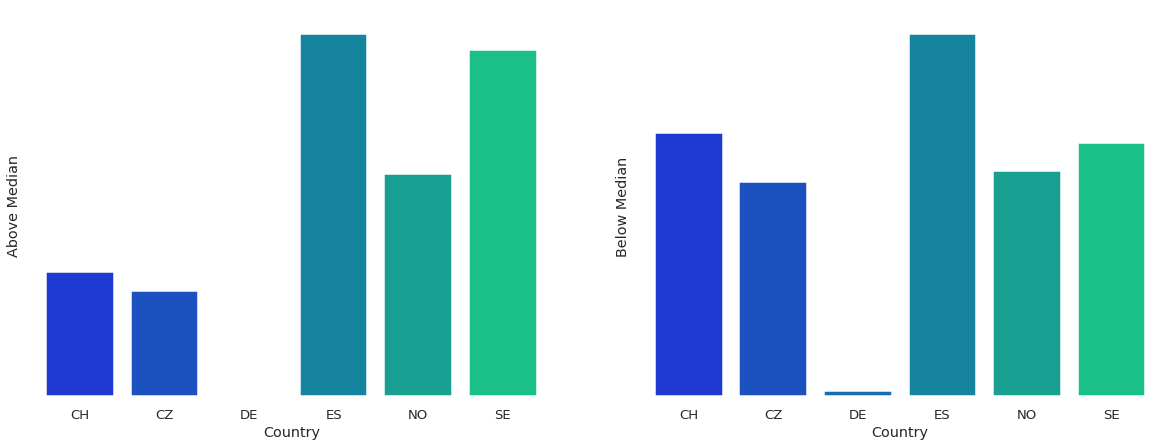

In [437]:
fig, ax = plt.subplots()

## add_subplot(rows, columns, index)
fig.add_subplot(121)
g = sns.barplot(x=table.index, y=table['Above Median'], palette='winter')
g.set_yticklabels([])
ax.set_xticklabels([])

fig.add_subplot(122)
g = sns.barplot(x=table.index, y=table['Below Median'], palette='winter')
g.set_yticklabels([])
ax.set_yticklabels([])

sns.despine(left=True, bottom=True)
plt.show()

In [450]:
for c in country:
    cntry = c.cntry.unique()
    mean = c.sclmeet.mean()
    median = c.sclmeet.median()
    print(cntry)
    print('Mean: ', mean)
    print('Median: ', median)

['CH']
Mean:  5.149830508474576
Median:  6.0
['CZ']
Mean:  4.613090306545153
Median:  5.0
['DE']
Mean:  4.666666666666667
Median:  5.0
['ES']
Mean:  5.2425828970331585
Median:  6.0
['NO']
Mean:  5.436619718309859
Median:  6.0
['SE']
Mean:  5.485515643105446
Median:  6.0


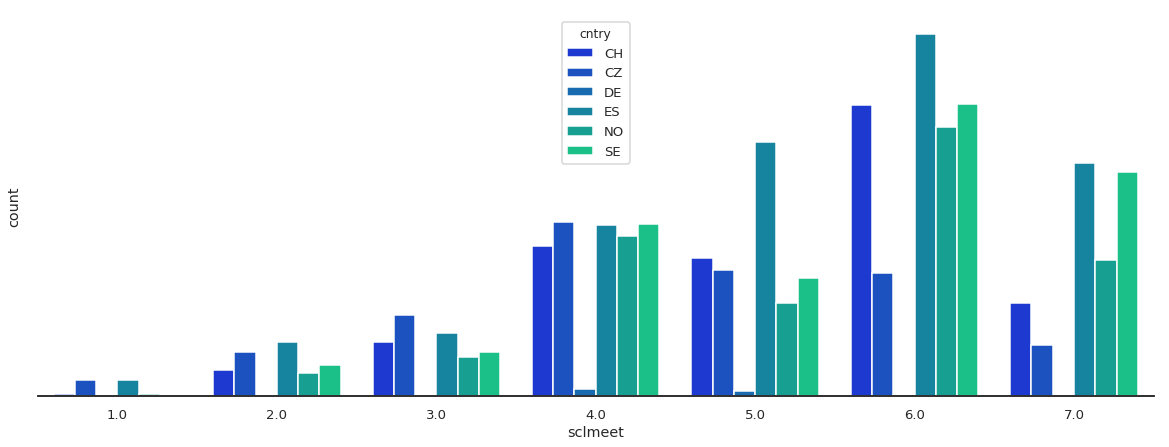

In [445]:
fig, ax = plt.subplots()

g = sns.countplot(x=df_2014.sclmeet, hue=df_2014.cntry, palette='winter')
g.set_yticklabels([])

sns.despine(left=True)
plt.show();

#### There are statistically significant differences between countries in how often people met socially in 2014.

 - From Moon's Median test we get a p-value of 1.31e-38 which tells us there is a significant difference between countries.
 - From comparing the medians we can see people in SE and NO reported meeting socially the most often with medians of 5.49 and 5.44 respectively.
 - People in CZ and DE reported meeting socially the least, with median values of 4.61 and 4.67 repsectively.

## Compare how often people took part in social activities, relative to others their age, in 2014.  Are there differences between countries?

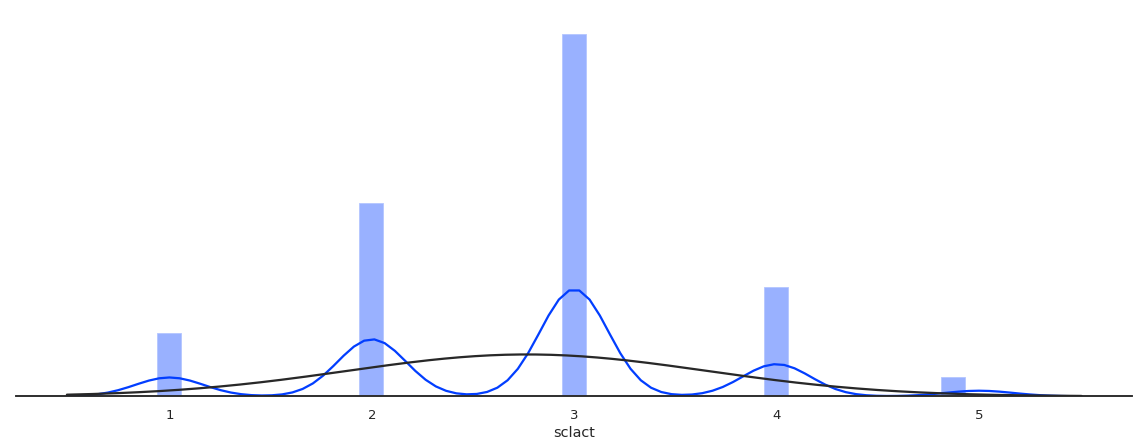

In [118]:
fig, ax = plt.subplots()

ax = sns.distplot(df_2014.sclact,
                  fit=norm,
                  hist_kws={'align':'left'})


sns.despine(left=True)
ax.set(yticklabels=[])

plt.show()

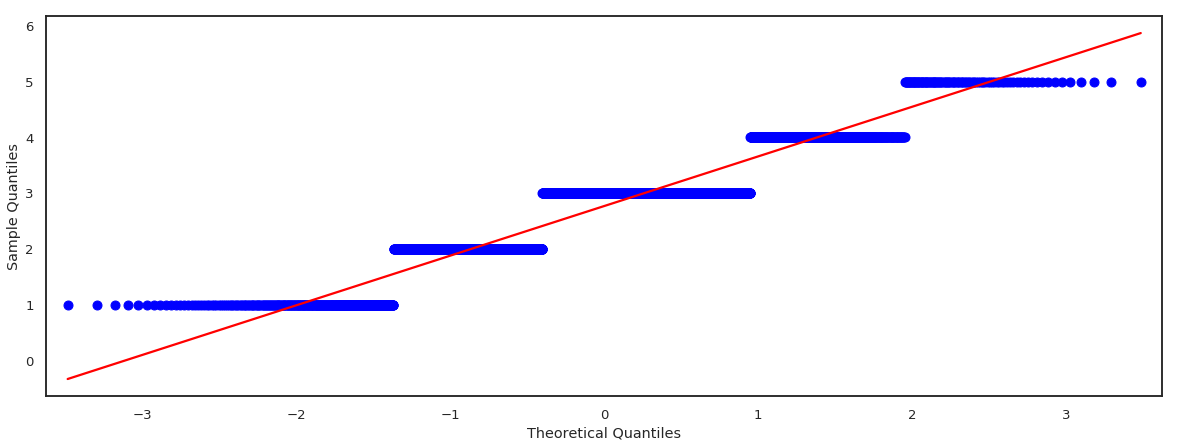

In [122]:
# qq plot
fig = sm.qqplot(df_2014.sclact, line='s')

In [119]:
## Anderson-Darling Test for Normalit
anderson_darling(df_2014.sclact)

Statistic: 231.309
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [120]:
# D'Agostino Test
dagostino(df_2014.sclact)

Statistics=1.006, p=0.605
Sample looks Gaussian (fail to reject H0)


In [121]:
# Shapiro-Wilk Test
shapiro(df_2014.sclact)

Statistics=0.884, p=0.000
Sample does not look Gaussian (reject H0)


In [359]:
ch_sclact = country[0].sclact
cz_sclact = country[1].sclact
de_sclact = country[2].sclact
es_sclact = country[3].sclact
no_sclact = country[4].sclact
se_sclact = country[5].sclact

In [454]:
# Kruskal test
scipy.stats.kruskal(ch_sclact,
                    cz_sclact,
                    de_sclact,
                    es_sclact,
                    no_sclact,
                    se_sclact)

KruskalResult(statistic=158.3878681890336, pvalue=2.1832965168557353e-32)

In [393]:
stat, p, median, table_act = scipy.stats.median_test(ch_sclact,
                                                 cz_sclact,
                                                 de_sclact,
                                                 es_sclact,
                                                 no_sclact,
                                                 se_sclact)
print('Chi Squared Statistic: ', stat)
print('P-Value: ', p)
print('Median: ', median)
print('Table (Row 1 = Counts Above Grand Median, Row 2 = Counts Below Grand Median)')
print(table_act)

Chi Squared Statistic:  59.924881035598176
P-Value:  1.2596854388958795e-11
Median:  3.0
Table (Row 1 = Counts Above Grand Median, Row 2 = Counts Below Grand Median)
[[ 253  151    4  334  258  381]
 [1222 1056   23 1958 1162 1345]]


In [394]:
cntry = list(df.cntry.unique())

table_act = pd.DataFrame(table_act)
table_act.columns = cntry
table_act = table_act.T
table_act.index.name = 'Country'
table_act.columns = ['Above Median', 'Below Median']
table_act.head(6)

,Above Median,Below Median
Country,,
CH,253,1222
CZ,151,1056
DE,4,23
ES,334,1958
NO,258,1162
SE,381,1345


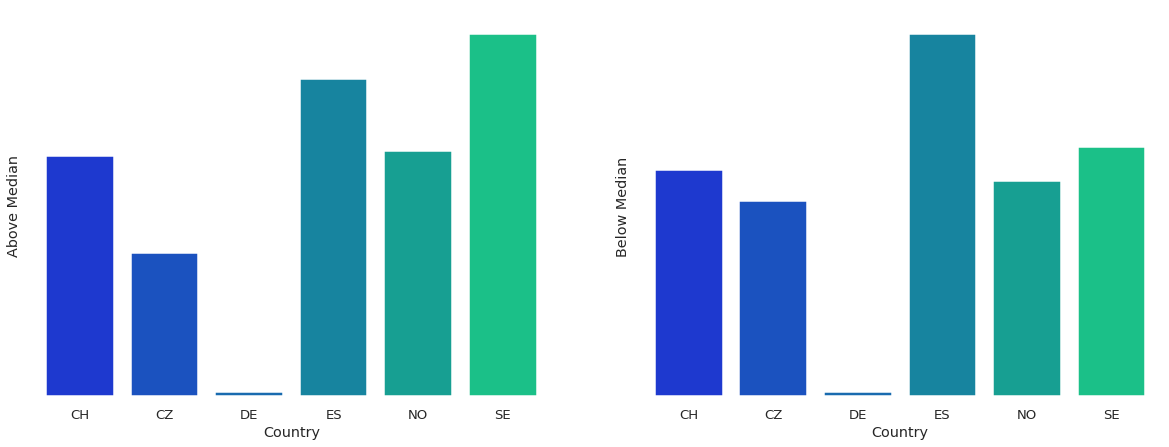

In [429]:
fig, ax = plt.subplots()

## add_subplot(rows, columns, index)
fig.add_subplot(121)
g = sns.barplot(x=table_act.index, y=table_act['Above Median'], palette='winter')
g.set_yticklabels([])
ax.set_xticklabels([])

fig.add_subplot(122)
g = sns.barplot(x=table_act.index, y=table_act['Below Median'], palette='winter')
g.set_yticklabels([])
ax.set_yticklabels([])

sns.despine(left=True, bottom=True)
plt.show()

In [452]:
for c in country:
    cntry = c.cntry.unique()
    mean = c.sclact.mean()
    median = c.sclact.median()
    print(cntry)
    print('Mean: ', mean)
    print('Median: ', median)

['CH']
Mean:  2.7477966101694915
Median:  3.0
['CZ']
Mean:  2.6735708367854185
Median:  3.0
['DE']
Mean:  2.814814814814815
Median:  3.0
['ES']
Mean:  2.601221640488656
Median:  3.0
['NO']
Mean:  2.9140845070422534
Median:  3.0
['SE']
Mean:  2.89513325608343
Median:  3.0


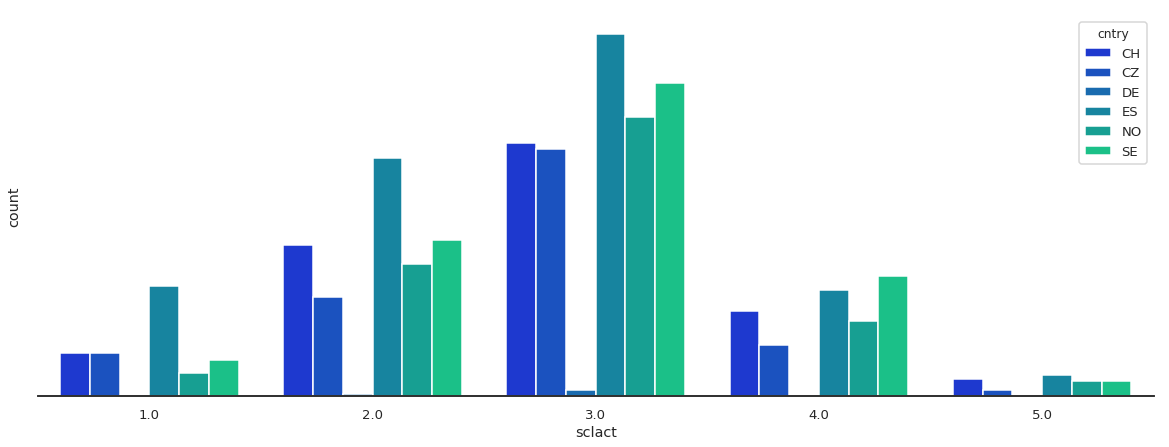

In [453]:
fig, ax = plt.subplots()

g = sns.countplot(x=df_2014.sclact, hue=df_2014.cntry, palette='winter')
g.set_yticklabels([])

sns.despine(left=True)
plt.show();

#### There are statistically significant differences in how often people took part in social activities, relative to others their age, in 2014.
 - Kruskal-Wallis and Moon's median test returned p-values of 2.18e-32 and 1.26e-11 allowing us to reject the null hypothesis.
 - On inspecting the means and medians however, values appear very similar among the countries.
 - ES has the lowest median value of 2.60.
 - NO has the highest median value of 2.91.
 